In [1]:
pip install pandas numpy nltk vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Load the Dataset into Pandas
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv("amazon.csv")

# Display the first few rows
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
#Preprocess the Data: Check for missing values and select the relevant column for sentiment analysis.
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if needed)
df = df.dropna(subset=['review_title'])

# Display a sample of the text column
df['review_title'].head()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


0    Satisfied,Charging is really fast,Value for mo...
1    A Good Braided Cable for Your Type C Device,Go...
2    Good speed for earlier versions,Good Product,W...
3    Good product,Good one,Nice,Really nice product...
4    As good as original,Decent,Good one for second...
Name: review_title, dtype: object

In [11]:
#Import and Use VADER for Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']  # Compound score is a single measure of sentiment

# Ensure df is a fresh copy to avoid SettingWithCopyWarning
df = df.copy()  # Add this line

# Apply sentiment analysis to the content column using .loc[]
df.loc[:, 'sentiment_score'] = df['review_title'].astype(str).apply(get_sentiment)

# Display results
df[['review_title', 'sentiment_score']].head()


,review_title,sentiment_score
0,"Satisfied,Charging is really fast,Value for mo...",0.4404
1,"A Good Braided Cable for Your Type C Device,Go...",0.2382
2,"Good speed for earlier versions,Good Product,W...",0.7178
3,"Good product,Good one,Nice,Really nice product...",0.8689
4,"As good as original,Decent,Good one for second...",0.4926


In [13]:
#Classify Sentiments: Convert sentiment scores into labels (positive, neutral, or negative).
# Function to classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply classification
df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Display results
df[['review_title', 'sentiment_score', 'sentiment_label']].head()


,review_title,sentiment_score,sentiment_label
0,"Satisfied,Charging is really fast,Value for mo...",0.4404,Positive
1,"A Good Braided Cable for Your Type C Device,Go...",0.2382,Positive
2,"Good speed for earlier versions,Good Product,W...",0.7178,Positive
3,"Good product,Good one,Nice,Really nice product...",0.8689,Positive
4,"As good as original,Decent,Good one for second...",0.4926,Positive


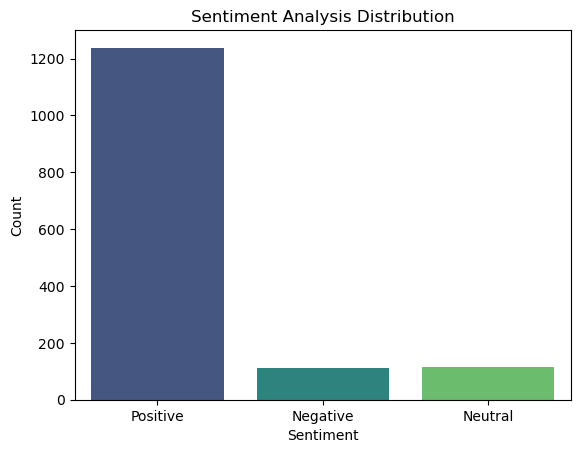

In [15]:
#Visualize Sentiment Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for sentiment labels
sns.countplot(x="sentiment_label", hue="sentiment_label", data=df, palette="viridis", legend=False)
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [17]:
#Save the processed dataset with sentiment scores.
df.to_csv("sentiment_results_amazon.csv", index=False)
print("Sentiment analysis results saved to 'sentiment_results_amazon.csv'")


Sentiment analysis results saved to 'sentiment_results_amazon.csv'


In [21]:
#Find Most Positive and Negative Reviews

# Display most positive reviews
df_sorted = df.sort_values(by='sentiment_score', ascending=False)
print("Most Positive Reviews:\n", df_sorted.head(5))

# Display most negative reviews
print("Most Negative Reviews:\n", df_sorted.tail(5))


Most Positive Reviews:
       product_id                                       product_name  \
922   B08J82K4GX  Samsung 24-inch(60.46cm) FHD Monitor, IPS, 75 ...   
1043  B07YR26BJ3  KENT 16052 Elegant Electric Glass Kettle 1.8L ...   
804   B07NC12T2R  boAt Stone 650 10W Bluetooth Speaker with Upto...   
961   B07RZZ1QSW  SLOVIC® Tripod Mount Adapter| Tripod Mobile Ho...   
1438  B08N6P8G5K  INALSA Air Fryer Digital 4L Nutri Fry - 1400W ...   

                                               category discounted_price  \
922                      Computers&Accessories|Monitors          ₹10,099   
1043  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹1,199   
804    Electronics|HomeAudio|Speakers|BluetoothSpeakers           ₹1,799   
961   Electronics|Cameras&Photography|Accessories|Tr...             ₹326   
1438  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹6,790   

     actual_price discount_percentage rating rating_count  \
922       ₹19,110              